Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

data1=pd.DataFrame(data,index=labels)

data1

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [8]:
data1.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [11]:
data1.loc[:,['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [17]:
data1.loc[["c", "d", "h"], ['animal', 'age']]


,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


**6.** Select only the rows where the number of visits is greater than 3.

In [23]:
data1.loc[data1["visits"]>3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [27]:
data1.loc[data1["age"].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [35]:
data1.loc[(data1["animal"]=="cat") & (data1["age"]<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [38]:
data1.loc[(data1["age"]>=2) & (data1["age"]<=4) ]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [43]:
data1.loc['f','age']=1.5
data1

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [47]:
data1["visits"].sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [48]:
data1.groupby('animal')['age'].mean()


animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [71]:
data1.loc['k']=["dog",4,2,"yes"]
data1

data1.drop("k",inplace=True)
data1


,animal,age,visits,priority
a,cat,2.5,1.0,yes
b,cat,3.0,3.0,yes
c,snake,0.5,2.0,no
d,dog,NaN,3.0,yes
e,dog,5.0,2.0,no
f,cat,1.5,3.0,no
g,snake,4.5,1.0,no
h,cat,NaN,1.0,yes
i,dog,7.0,2.0,no
j,dog,3.0,1.0,no


**14.** Count the number of each type of animal in `df`.

In [73]:
data1.groupby('animal')['animal'].count()

animal
cat      4
dog      4
snake    2
Name: animal, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [77]:
data1.sort_values(by=['age', 'visits'], ascending=[False, True], inplace=True)
data1


,animal,age,visits,priority
i,dog,7.0,2.0,no
e,dog,5.0,2.0,no
g,snake,4.5,1.0,no
j,dog,3.0,1.0,no
b,cat,3.0,3.0,yes
a,cat,2.5,1.0,yes
f,cat,1.5,3.0,no
c,snake,0.5,2.0,no
h,cat,NaN,1.0,yes
d,dog,NaN,3.0,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [92]:
data1 = data1.replace({'priority': {'yes': 'True', 
                                'no': 'False'}})
data1
  

,animal,age,visits,priority
i,dog,7.0,2.0,NaN
e,dog,5.0,2.0,NaN
g,python,4.5,1.0,NaN
j,dog,3.0,1.0,NaN
b,cat,3.0,3.0,NaN
a,cat,2.5,1.0,NaN
f,cat,1.5,3.0,NaN
c,python,0.5,2.0,NaN
h,cat,NaN,1.0,NaN
d,dog,NaN,3.0,NaN


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [90]:
data1=data1.replace({'animal':{'snake':'python'}})
data1

,animal,age,visits,priority
i,dog,7.0,2.0,NaN
e,dog,5.0,2.0,NaN
g,python,4.5,1.0,NaN
j,dog,3.0,1.0,NaN
b,cat,3.0,3.0,NaN
a,cat,2.5,1.0,NaN
f,cat,1.5,3.0,NaN
c,python,0.5,2.0,NaN
h,cat,NaN,1.0,NaN
d,dog,NaN,3.0,NaN


**18.** Load the ny-flights dataset to Python

In [2]:
data2=pd.read_csv(r'C:\Users\sakthi\Downloads\ny-flights.csv')
data2

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [115]:
data3=data2.groupby("airline_id")["airline_id"].count()
#data3['airline_id'].idmax()
data3.idxmax()

20409

**20.** Draw a plot between dep_delay and arr_delay

In [ ]:

plt.hist(data2["dep_delay"])
plt.hist(data2["arr_delay"])
plt.show()

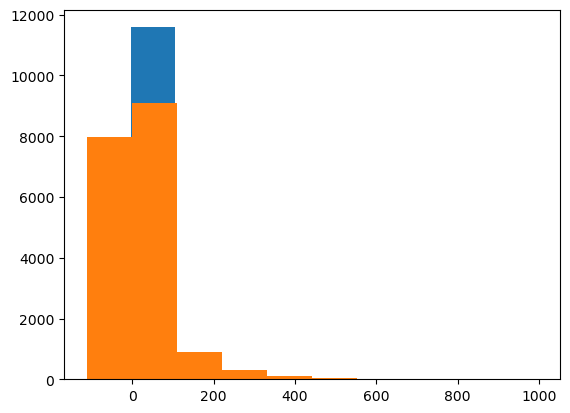

In [3]:

plt.hist(data2["dep_delay"])
plt.hist(data2["arr_delay"])
plt.show()

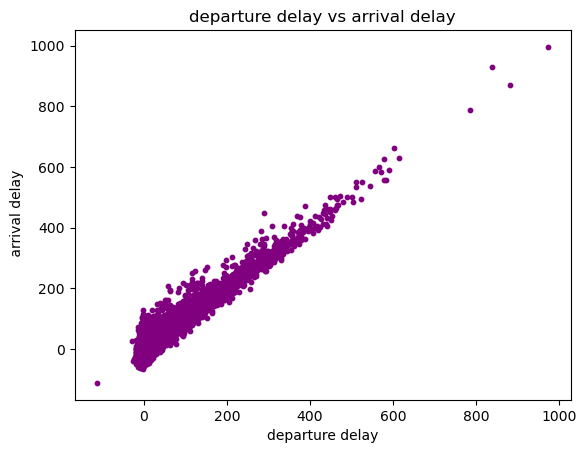

In [4]:
plt.scatter(data2["dep_delay"],data2["arr_delay"], s=10, color="purple")
plt.title("departure delay vs arrival delay")
plt.xlabel("departure delay")
plt.ylabel(" arrival delay")
plt.show()

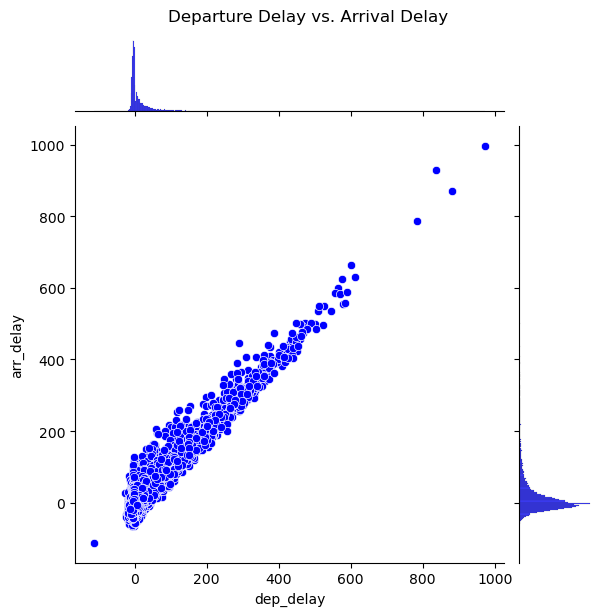

In [5]:
sns.jointplot(data=data2, x='dep_delay', y='arr_delay', kind='scatter', color='blue')

plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.suptitle('Departure Delay vs. Arrival Delay', y=1.02)


plt.show()

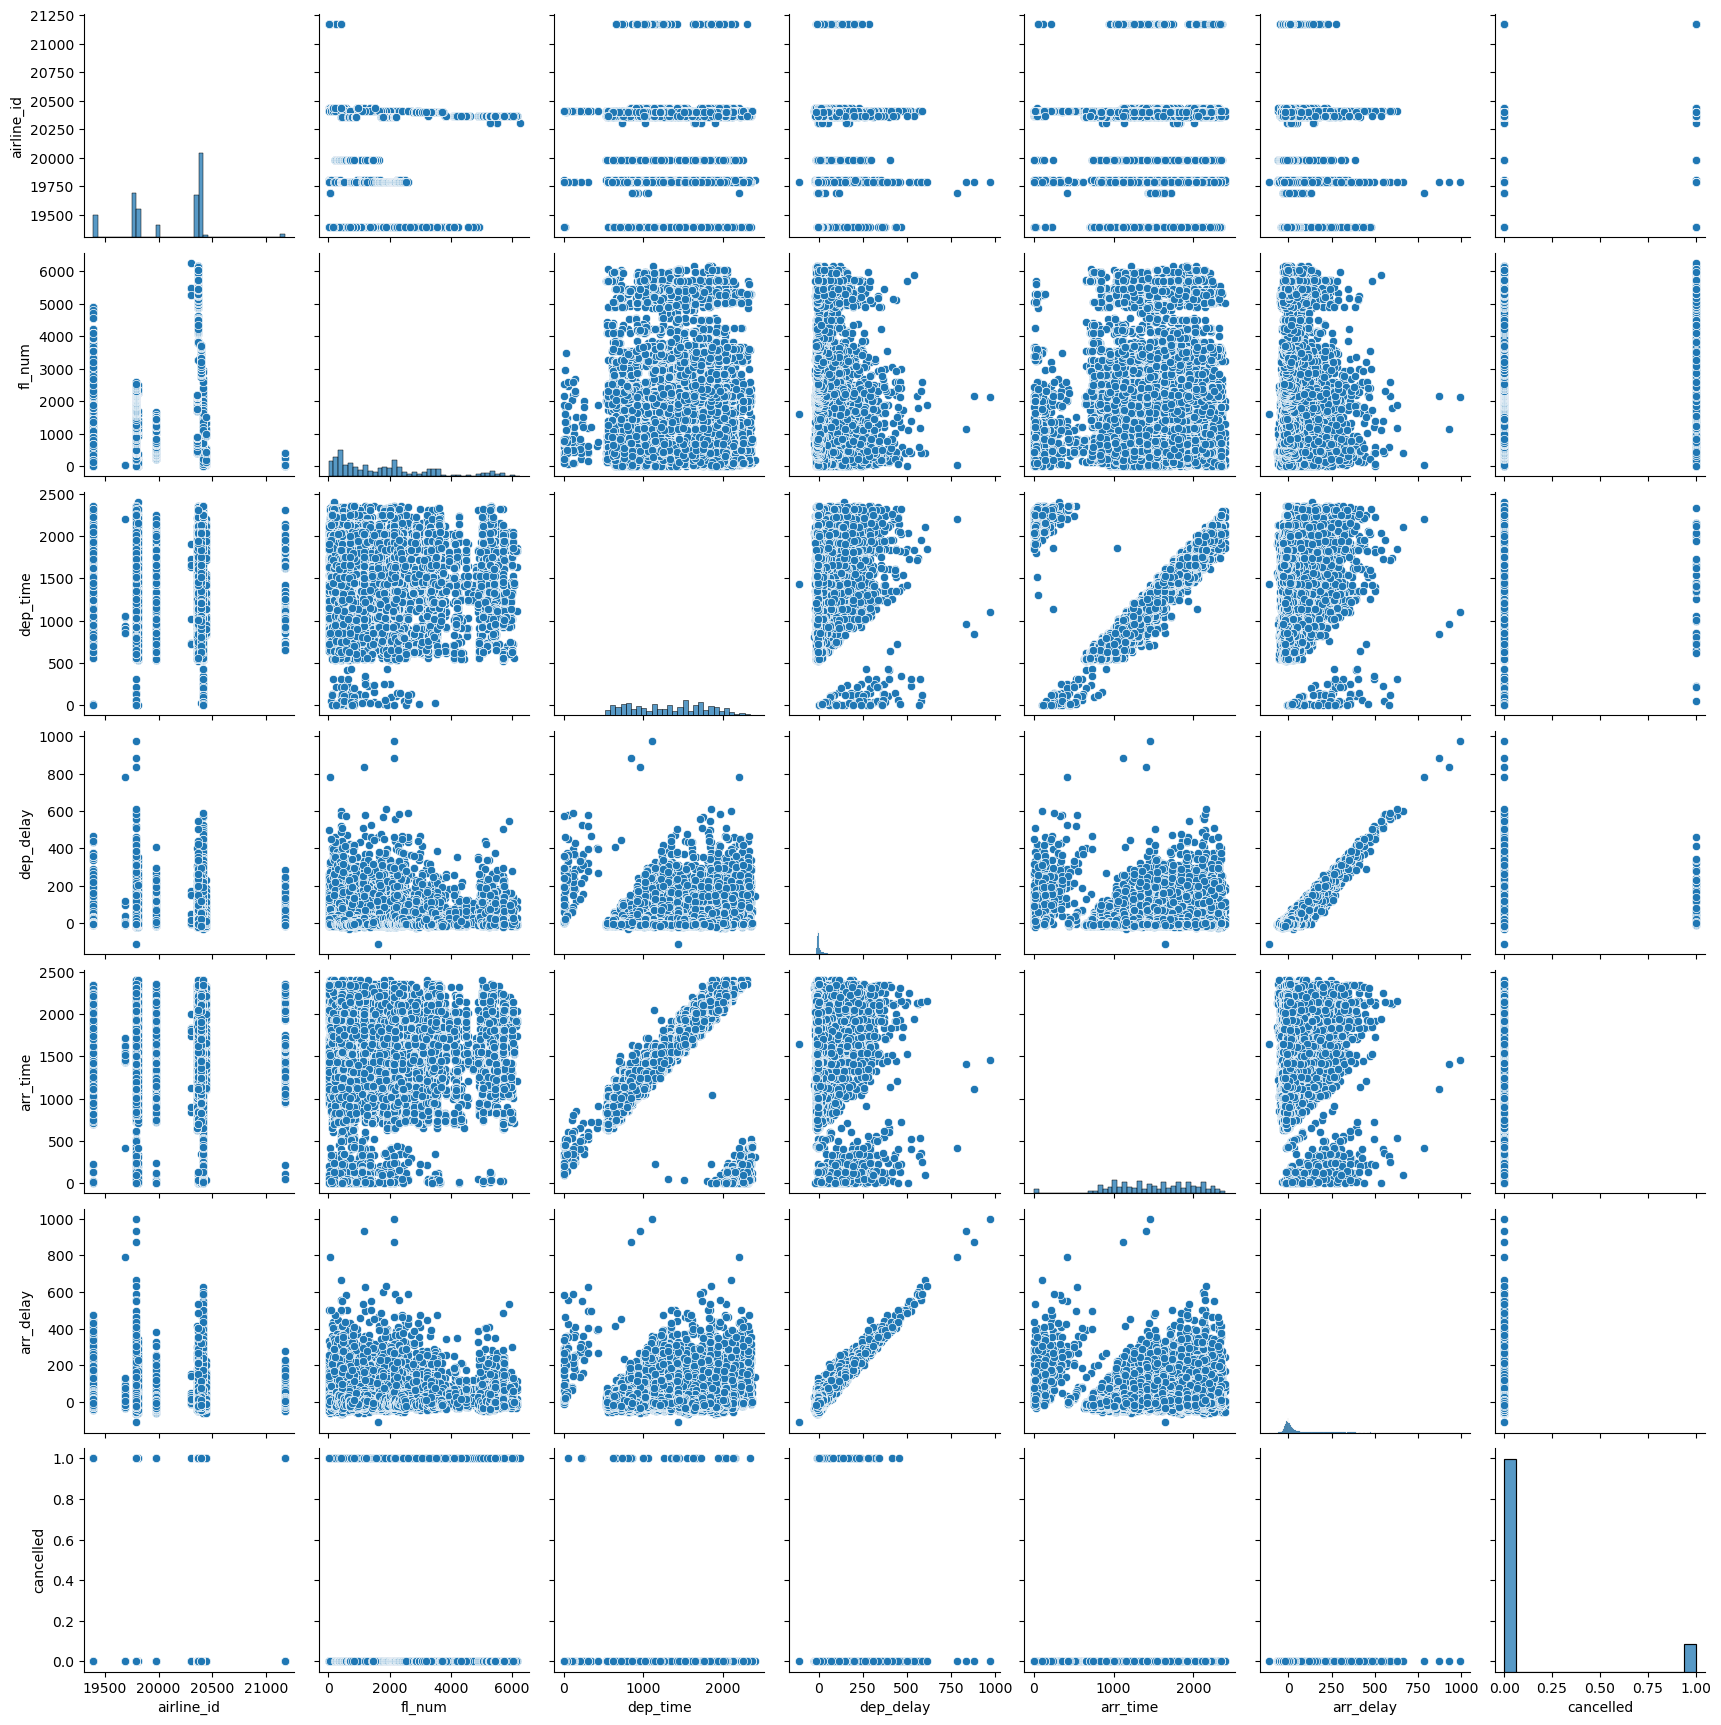

In [6]:
sns.pairplot(data2)
plt.show

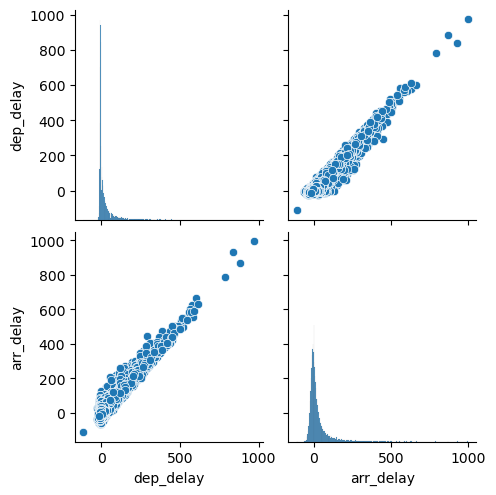

In [7]:
slice_data=data2[["dep_delay","arr_delay"]]
sns.pairplot(slice_data)